In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.isnull().sum()   # gives a pandas series object

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
drop_columns = []
for i,j in df.isnull().sum().items():
    print(i,j)
    if j >= 600:
        drop_columns.append(i)
        

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [6]:
drop_columns

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
df1 = df.drop(drop_columns,axis=1)

In [8]:
len(df.columns)

81

In [9]:
len(df1.columns)

76

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

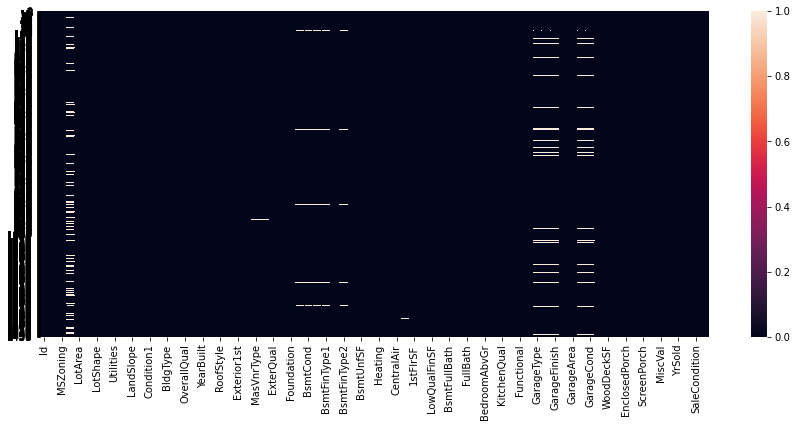

In [11]:
plt.figure(figsize=(15,6))
sns.heatmap(df1.isnull(),yticklabels=True )

In [12]:
a=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
data_type = df1.dtypes
print(type(data_type))
print(data_type)

<class 'pandas.core.series.Series'>
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object


In [14]:
lst=[]
lst1=[]
for i,j in data_type.items():
    if j != 'object':
        lst.append(i)
    else:
        lst1.append(i)

In [15]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
df1['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [17]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
lst[:5]

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']

In [19]:
print(type(df1['LotFrontage'].mode()))
print(df1['LotFrontage'].mode())

<class 'pandas.core.series.Series'>
0    60.0
dtype: float64


In [20]:
df1['LotFrontage'].mode()[0]

60.0

In [21]:
for i in lst:
    df1[i] = df1[i].fillna(df[i].mean())

In [22]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [23]:
lst[0:5]   # dtype==object

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']

In [24]:
for i,j in df1.isnull().sum().items():     # remaining null columns
    if j:
        print(i,j)
        df1[i] = df1[i].fillna(df1[i].mode()[0])

MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [25]:
for i,j in df1.isnull().sum().items():     # remaining null columns
    if j:
        print(i,j)

In [26]:
df1['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [27]:
df1['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [28]:
df[df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [29]:
df1[df1['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [30]:
df1[df1['Id']==1379]['Electrical']       # Id==1379 was null

1378    SBrkr
Name: Electrical, dtype: object

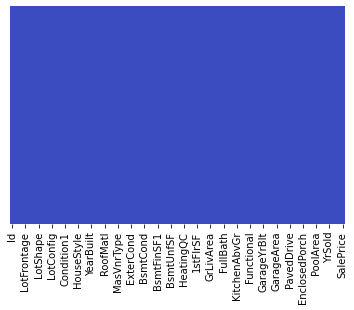

In [31]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [32]:
df2 = df1.drop(['Id'],axis=1)

In [33]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [34]:
columns = list(df2.columns)

In [35]:
len(columns)

75

In [36]:
columns[:5]

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street']

In [37]:
df2.shape

(1460, 75)

## Handle Categorical Features

In [38]:
len(lst1)    # lst1 contains columns with categorical features

38

# Handling Test Data 
 we need to do the same chagnes in test data as in train data before creating dummies because test data may have some uniques values not present in train data which might create problem in evaluting model and after than we will combine train and test data before creating dummies so that both will have same dummies

In [39]:
tdf = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [40]:
tdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [41]:
tdf.shape

(1459, 80)

In [42]:
tdf.isnull().sum() 

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [43]:
drop_columns # we need to drop the same columns as dropped in df

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [44]:
tdf1 = tdf.drop(drop_columns,axis=1)

In [45]:
len(tdf1.columns)

75

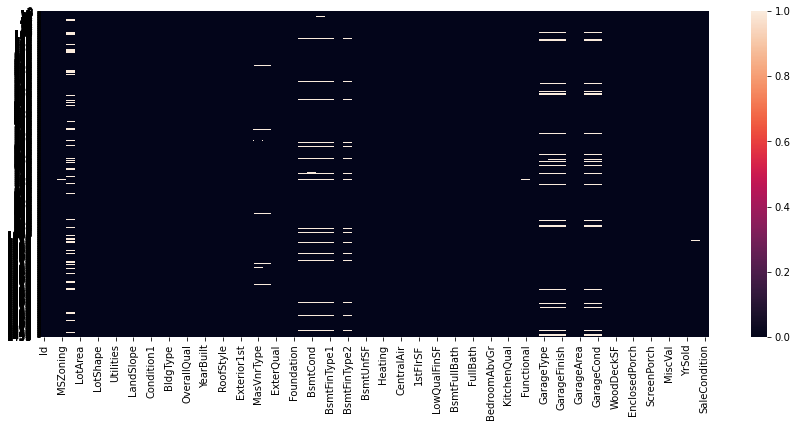

In [46]:
plt.figure(figsize=(15,6))
sns.heatmap(tdf1.isnull(),yticklabels=True )

In [47]:
tlst1 = tdf1.columns[tdf1.dtypes==object]
tlst =  tdf1.columns[~(tdf1.dtypes==object)]

In [48]:
print(tlst1)
print(tlst)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt

In [49]:
tdf1['MSZoning'].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

In [50]:
print(tdf1['LotFrontage'].mode())

0    60.0
dtype: float64


In [51]:
for i in tlst:
    tdf1[i] = tdf1[i].fillna(tdf[i].mean())

In [52]:
for i,j in tdf1.isnull().sum().items():     # remaining null columns
    if j:
        print(i,j)
        tdf1[i] = tdf1[i].fillna(tdf1[i].mode()[0])

MSZoning 4
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinType2 42
KitchenQual 1
Functional 2
GarageType 76
GarageFinish 78
GarageQual 78
GarageCond 78
SaleType 1


In [53]:
for i,j in tdf1.isnull().sum().items():     # remaining null columns
    if j:
        print(i,j)

In [54]:
tdf1['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseF', 'FuseP'], dtype=object)

In [55]:
tdf1['Electrical'].value_counts()

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [56]:
tdf[tdf['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [57]:
tdf1[tdf1['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [58]:
tdf1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


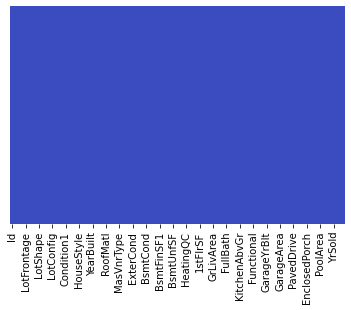

In [59]:
sns.heatmap(tdf1.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [60]:
tdf2 = tdf1.drop(['Id'],axis=1)

In [61]:
tdf2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [62]:
len(tdf2.columns)

74

In [63]:
tdf1.shape

(1459, 75)

In [64]:
df2.shape

(1460, 75)

In [65]:
df2.loc[0:1459]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


## FINISHED MODIFYING TEST DATA

# function for get_dummies

In [66]:
def change_categorical_cols(dataframe,cols):
    return_df = dataframe.copy()
    print("RETURN DF SHAPE",return_df.shape)
    for column in cols:
        dummies = pd.get_dummies(dataframe[column],drop_first=True)
        return_df = pd.concat([return_df,dummies],axis=1)
        return_df.drop(column,axis=1,inplace=True)
    print("RETURN DF SHAPE",return_df.shape)
    return return_df

In [67]:
mix_df1 = pd.concat([df2,tdf2],axis=0)

In [68]:
mix_df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [69]:
mix_df1['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [70]:
mix_df1.shape

(2919, 75)

In [71]:
len(lst1)

38

In [72]:
lst1.sort()
print(lst1)

['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [73]:
for i in lst1:
    print(i," : ",mix_df1[i].unique())

BldgType  :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
BsmtCond  :  ['TA' 'Gd' 'Fa' 'Po']
BsmtExposure  :  ['No' 'Gd' 'Mn' 'Av']
BsmtFinType1  :  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']
BsmtFinType2  :  ['Unf' 'BLQ' 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtQual  :  ['Gd' 'TA' 'Ex' 'Fa']
CentralAir  :  ['Y' 'N']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Electrical  :  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
ExterCond  :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
ExterQual  :  ['Gd' 'TA' 'Ex' 'Fa']
Exterior1st  :  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd  :  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
Foundation  :  ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
Fun

In [74]:
mix_df2 = change_categorical_cols(mix_df1,lst1)

RETURN DF SHAPE (2919, 75)
RETURN DF SHAPE (2919, 233)


In [75]:
mix_df3 = mix_df2.loc[:,~mix_df2.columns.duplicated()]

In [76]:
mix_df3.shape

(2919, 177)

In [77]:
mix_df3.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Pave,NoSeWa
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,0,0,0,1,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [78]:
mix_df3.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'Pave',
       'NoSeWa'],
      dtype='object', length=177)

In [79]:
mix_df1.iloc[1422,:]

MSSubClass          120
MSZoning             RM
LotFrontage          37
LotArea            4435
Street             Pave
                  ...  
MoSold                3
YrSold             2008
SaleType             WD
SaleCondition    Normal
SalePrice        136500
Name: 1422, Length: 75, dtype: object

In [80]:
df_train = mix_df3.iloc[:1459]    # df_train = mix_df3.iloc[:1459,:]
df_test = mix_df3.iloc[1460:,:]

In [81]:
df_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Pave,NoSeWa
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,0,0,0,1,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,2004,2005,0.0,410.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,0,0,0,0,1,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [82]:
df_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Pave,NoSeWa
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,0,0,0,1,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,0,0,0,1,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [83]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [100]:
df_test.shape

(1459, 176)

## IGNORE FROM HERE

In [84]:
df2.shape

(1460, 75)

In [85]:
df2['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [86]:
df3 = df2.copy()
print(df3.shape)
df4 = change_categorical_cols(df3,lst1)
print(df3.shape)

(1460, 75)
RETURN DF SHAPE (1460, 75)
RETURN DF SHAPE (1460, 233)
(1460, 75)


In [87]:
df4.shape

(1460, 233)

In [88]:
c = df4.columns.tolist()
print(len(c))

233


In [89]:
df4 =df4.loc[:,~df4.columns.duplicated()]

In [90]:
df4.shape

(1460, 177)

  ## TILL HERE ---------------------------------------------------------------------------

# ***TRYING DIFFERENT MODELS***

In [117]:
from sklearn.model_selection import GridSearchCV

In [103]:
X_train = df_train.drop('SalePrice',axis=1)
y_train = df_train['SalePrice']

In [104]:
print(X_train.shape)
print(y_train.shape)

(1459, 176)
(1459,)


In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
lr_clf.score(X_train,y_train)

0.9060011051410964

## PREDICT VALUES

In [121]:
y_predict = lr_clf.predict(df_test)
print(y_predict)

[115574.17332477 155820.45235612 185286.14195489 ... 176916.70201018
 102715.34730971 233824.56081314]


In [124]:
pred = pd.DataFrame(y_predict)
pred.head()

,0
0,115574.173325
1,155820.452356
2,185286.141955
3,193246.752165
4,217954.650080


In [125]:
##Create Sample Submission file and Submit using ANN
sub_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
print(datasets.head())

     Id      SalePrice
0  1461  115574.173325
1  1462  155820.452356
2  1463  185286.141955
3  1464  193246.752165
4  1465  217954.650080


In [126]:
datasets.to_csv('sample_submission.csv',index=False)

In [127]:
from sklearn import ensemble

In [128]:

#Gradient Boosting Regressor
gbr_model = ensemble.GradientBoostingRegressor(
    n_estimators=3000, 
    learning_rate=0.01,
    max_depth=10, 
    max_features='sqrt',
    min_samples_leaf=15, 
    criterion='mse', 
    min_samples_split=10, 
    random_state =10).fit(X_train,y_train)

gbr_predict = gbr_model.predict(df_test)


In [129]:
pred = pd.DataFrame(gbr_predict)
sub_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission1.csv',index=False)

# Neural Network

In [130]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [161]:
model = keras.Sequential([
    layers.Dense(64, activation='relu',input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse','accuracy'])

In [162]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                11328     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


In [163]:
EPOCHS = 1000

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

In [156]:
test_predictions = model.predict(df_test).flatten()

In [158]:
pred = pd.DataFrame(test_predictions)
sub_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission2.csv',index=False)